# Lab 6: Neural Networks and deep learning

<font color="red">
This is a short review of the deep learning theory, if you attended the theory lecture you can skip ahead to the assignment.</font>

Machine learning has seen a huge increase in interest in the past years, mainly due to breakthroughs in the field of **neural networks** and **deep learning**. This subfield is so popular right now that it has most of the things you heard about ML or AI in the popular media can be attributed to these models. They are however only a part of the machine learning field just like other families of models like SVMs. That being said, these models are extremely powerful when used correctly and have allowed for huge breakthroughs in image recognition, image segmentation, voice recognition, image generation and game play just in the past years. Many products and services like Google Translate, Siri or self-driving cars rely on deep learning. 

Neural Networks (NNs) are not exactly new, their origins can be dated back to 1943. Neural Networks were originally inspired by the animal brain even though they are only a very crude approximation. Modern Deep Neural Networks are much closer related to statistical regression techniques than to biological systems but they still take inspiration from the animal brain. The techniques used to train neural networks have also been known for quite a long time, dating back to 1975. So why do we only see these breakthroughs now ? The first reason why neural networks now are much more powerful than in the past has to do with the abundance of data that is available to learn from. Right now we generate 2.5 quintillion bytes of data each day. People uploading photos to social media and interacting with mobile devices generate a wealth of information that can be used to train more powerful machine learning models. Processing data at this scale requires compute infrastructure of a similar scale which brings us to the second crucial reason for the success of deep learning methods: powerful hardware implementations. A typical computer program runs on the **Central Processing Unit (CPU)** of the computer. A CPU can handle a wide variety of tasks and is extremely flexible. Deep neural networks however need many operations of the same type and these can be done efficiently in parallel by a **Graphics Processing Unit (GPU)**. GPUs were originally designed to accelerate the generation of output on a screen and high-end GPUs were almost exclusively reserved for playing video games. However, the operations that form the neural network can be very efficiently mapped to the GPU hardware. It is not uncommon to see a speedup of 40x for a GPU compared to a CPU. Together these two advances have enabled the breakthrough achievements we have witnessed in the last years.

Given enough training data and computational resources, deep neural networks are extremely powerful. They can be applied for classification and regression tasks and can be trained supervised, unsupervised or using reinforcement learning on different types of data such as images, video, audio, text, timeseries, ...
Deep learning is not without problems. Deep Neural Networks need large amounts of information to learn a specific task. Image recognition models are trained on millions of labelled images. Google’s AlphaGo model that defeated a professional Go player used hundreds of thousands of examples of human played games and millions of games played against itself. Secondly, the models generally lack interpretability. It is hard for a human to understand how a neural network actually performs a specific task. We understand the global mechanism but the details are hidden within the many parameters of the network. Neural network models are also very expensive to train and to evaluate.

## Neural network architectures
Researchers that apply deep neural networks have to design a suitable **architecture**. These neural networks are built by chaining multiple **layers** where each layer performs some **transformation** that is typically **learned from data**. The network then calculates as composed function $f(\mathbf{x}) = f^{(1)}(f^{(2)}(f^{(3)}(f^{(4)}(\mathbf{x}))))$.  The length of the chain is called the **depth** of the network. Neural network can have everything between 1 layer up to thousands for layers in very specific architectures.   The first layer that receives the input is called the **input layer** and the layer that returns the output is called the **output layer**. The layers in between are the **hidden layers**. Each layer is composed of hundreds of **neurons** that perform the basic operations.  The number of neurons in a layer is called the **width of the layer**. The neurons of different layers are connected and each connection has a **weight**. The network is trained by tweaking these weights using **gradient descent** to optimize a **loss function**. Most common architectures let the data flow in one direction. The neurons then define a **directed acyclical graph**. We call these networks **feedforward neural networks** or **multilayer perceptrons (MLP)**. It is however also possible to have **loops** and **recurrence**: **recurrent neural networks (RNN)**. These types of connections are typically used to process sequential data such as text or timeseries.

<div style="float:left">
<img src="images/mlp.png" width="750" />
    
source: https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed
</div>

We call these models **neural** because they were originally loosely inspired by how the  brain works with hierarchies of interconnected neurons. Some introductions use biological terms such as **soma** and **dendrite** to refer to the neurons or connections.  Modern neural network research however has little connection to biological neurons and instead relies more on mathematical en engineering insights. It is therefore better to approach these models as function approximation techniques than as a simulation of a biological system.

A good way to understand neural networks is to start from linear models such as **linear or logistic regression**. Linear models can only model linear relationships. If we need to model non-linear relationships we can use the **kernel trick** that transforms the features in a non-linear way. These **kernels** transform the input $\mathbf{x}$ to some other space $\phi(\mathbf(x))$. We can think of this new representation as a set of **features** that makes it easier to make predictions about the data. But how do we define these transformations ? The most straightforward options is to use **expert domain knowledge** to define features manually, which is what the computer vision community did for decades. We can also use very general features such as the **RBF-kernel**, which is what an SVM does. Deep neural networks on the other hand **learn the features from data**. This is what distinguishes **deep learning** from **shallow** models. This is shown in the figure below. The names are somewhat poorly chosen since deep learning is a subfield of machine learning and not an alternative. A better title would be "traditional machine learning".

<div style="float:left">
<img src="images/mldl.jpg" width="750" />
    
source: https://verhaert.com/difference-machine-learning-deep-learning/
</div>

## Neural network layers
A single layer in a neural network has a fixed set of neurons. Each neuron is connected to all neurons in the previous layer. Each connection has a **weight**. The neuron calculates the **weighted sum** of the input with each corresponding weight. Then this result is passed through a **non-linearity** called the **activation function**. It is this function that allows the network to learn **non-linear relationships**. Typical **activation functions** are **sigmoids**, **hyperbolic tangent (tanh)** or the **rectified linear unit (ReLU)**. We typically also include a **bias** either by adding a constant input of one or by adding a learned value to the output of each neuron.
<div style="float:left">
<img src="images/neuron.png" width="400" />
</div>
<div style="float:left">
<img src="images/activation.png" width="750" />
    
source: https://towardsdatascience.com/complete-guide-of-activation-functions-34076e95d044
</div>

A single layer has more than one neuron (typically hundreds or thousands). Each of these neurons calculate a single value. The resulting vector is then given to the next layer as input. We can efficiently calculate all outputs using a matrix multiplication. This is the reason why **GPUs** are so suited for neural networks, they are able to perform the matrix multiplications much more efficiently in parallel than a sequential **CPU**. The formulas below show how this is done for a layer with three inputs and two neurons, resulting in two outputs.

$\mathbf{x} = \begin{bmatrix}
x_1  \\
x_2  \\
x_3
\end{bmatrix}$ (the input vector with three inputs)

$\mathbf{W} = \begin{bmatrix}
x_{11} & w_{12} & w_{13}  \\
x_{21} & w_{22} & w_{23}  \\ 
\end{bmatrix}$ (the weight matrix of a layer with three input and two neurons)

$\mathbf{b} = \begin{bmatrix}
b_1 \\
b_2 
\end{bmatrix}$ (the bias vector of a layer with two neurons)

$\mathbf{h} = f(\mathbf{x} \cdot \mathbf{W}  + \mathbf{b}) = \begin{bmatrix}
h_1 \\
h_2  \\
\end{bmatrix}$ (the activation of the layer. $f$ is the activation function)

As a neural network designer you are free to choose the depth and width of the network. If you increase the depth or width, you increase the **capactiy** of the model and this will hopefully result in a better performance. You however are also increasing the risk of **overfitting** of course the training time and computational cost will also increase. The input dimension of the first layer depends on the dimensionality of the input and the output dimension (the number of neurons) of the last layer depends on the dimensionality of the target. Neural network can be used for a variety of tasks, including binary or multi-label classification. In the case of N-class classification, the last layer will have *N* neurons, one for each class. The target is then also transformed into a **one-hot encoding**. In the case of 10-class classification our targets will then look like $[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]$. To rescale the predictions of the network into this range we typically use a **softmax function**
<div style="float:left">
<img src="images/softmax.png"  />
</div>

## Neural Network training
Neural networks are usually trained using **gradient descent**. The loss is however **non-convex** and gradient descent is not guaranteed to find a **global optimum**. In practice however, gradient descent works very well for these problems. Especially when using tricks such as **momentum**. There has gone much research into more advanced **update rules** such as **adam** and **RMSprop**. To calculate the gradient we use **backpropagation**. **backprop** is in fact nothing more than the **chain rule** it computes the gradient of the loss function with respect to the weights of the network for a single input/output example. Once we have these gradients, we know how to change the weight to reduce the loss. The good thing is we don't  have to calculate all **partial derivatives** of the composed functions ourselves. Modern deep learning toolkit rely on **automatic differentiation** to calculate them for us. Neural networks are typically trained on (very) large sets of data. Therefore we use **minibatches** of data to calculate the gradient.

# Assignment

We will perform image classification on Fashion-MNIST, a variant of the very common benchmark dataset: MNIST: http://yann.lecun.com/exdb/mnist/. The task is to recognize various fashion items. There are 60,000 train samples and 10,000 test samples. This is much larger than most datasets we used previously but it is still a very small toy dataset according to the deep learning community. Since deep learning is such a broad field, there are many dedicated toolkits to design and train neural networks. The most common ones are **Pytorch** (Facebook) and **Tensorflow** (Google). We will use **Keras** which is a wrapper around Tensorflow that makes it easy to for beginners to get started with deep learning. Keras has a built-in functionality to load the Fashion-MNIST dataset.

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(60000,)


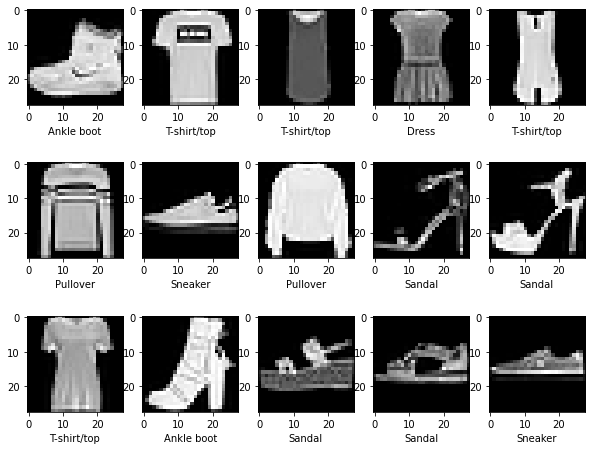

In [95]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
import seaborn
import keras
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i], cmap='gray')
    axi.set_xlabel(class_names[y_train[i]])

## Data preprocessing
We will do some minimal data preprocessing by:
- Reshaping the 28*28 images into a 784 dimensional vector (we could also integrate this in our neural network by using a [flatten](https://keras.io/api/layers/reshaping_layers/flatten/) layer)
- Casting the pixel values (integers between 0 and 255) to floats and dividing by 255 to get numbers between 0 and 1
- Transforming the class labels (0-9) to **one-hot encodings**.

<font color='red'>Task: What would the input dimension of the network be if we had RGB images instead of grayscale ? </font>


In [96]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

## Build the model
<font color='red'>Task: Build a sequential model with three hidden dense layers of 128, 200 and 256 neurons each with a ReLu activation function. The output layer has a softmax activation. Also, calculate the number of parameters used in this model and the required memory size to store them. See https://keras.io/guides/sequential_model/ for an example.</font>

In [97]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model = Sequential(
    [
        Dense(128, activation="relu", name="layer1"),
        Dense(200, activation="relu", name="layer2"),
        Dense(256, activation="relu", name="layer3")
    ]
)

# model.add()

# model.add(keras.layers.Softmax())
model.add(Dense(10, activation='softmax'))


In [98]:
print(keras.__version__)

2.7.0


<font color='red'>Task: Verify your results by calling the built-in function.</font>

In [99]:
# x = tf.ones((1, 128))   # 128 want dat is eerste laag
# y = model(x)
# model.summary()

## Train the model
First we define some methods to help us plot the results. Afterwards, we train the network for ten **epochs**. An epoch is defined as one pass through the dataset. Keras makes it easy to train to model by providing a *fit* function just like scikit-learn does. After training the model using the fit method, we evaluate on the test data and plot the accuracies and losses throughout the training process.

In [100]:
def plot_accuracies(accuracy, val_accuracy, show=True, title="Model accuracy"):
  # Plot training & validation accuracy values
    plt.plot(accuracy)
    plt.plot(val_accuracy)
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    if show:
      plt.show()

def plot_loss(loss, val_loss, show=True, title='Model loss'):
    # Plot training & validation loss values
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    if show:
      plt.show()

<font color='red'>Task: Setup the configuration of the model for training. See https://keras.io/api/optimizers/ for documentation.</font>

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5717 - accuracy: 0.7922 - val_loss: 0.4710 - val_accuracy: 0.8318
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4169 - accuracy: 0.8484 - val_loss: 0.4288 - val_accuracy: 0.8456
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3716 - accuracy: 0.8658 - val_loss: 0.4088 - val_accuracy: 0.8532
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8728 - val_loss: 0.3771 - val_accuracy: 0.8649
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8801 - val_loss: 0.3947 - val_accuracy: 0.8616
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3210 - accuracy: 0.8812 - val_loss: 0.3770 - val_accuracy: 0.8667
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3058 - accuracy: 0.8858 - val_loss: 0.3486 - val_accuracy: 0.8737
Epoch 

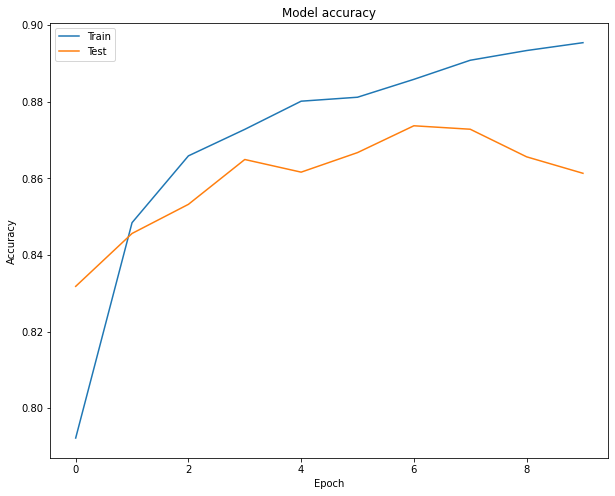

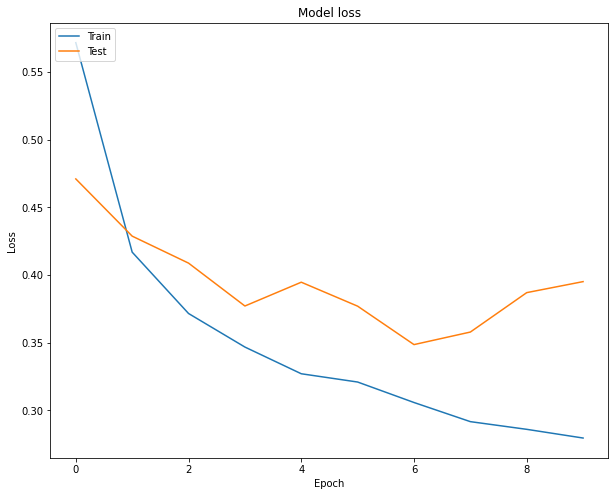

In [101]:
from tensorflow.keras.optimizers import SGD 

batch_size = 128
epochs = 10

#setup your optimizer before training
# opt = SGD()     # default: learning_rate=0.01

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1, momentum=0.9), metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_accuracies(history.history['accuracy'], history.history['val_accuracy'])
plot_loss(history.history['loss'], history.history['val_loss'])

<font color='red'>Task: How many times are the weights updated during training ?</font>

In [102]:
...

Ellipsis


## Tuning the model

Neural networks can be tricky to tune well. They have many **hyperparameters** such as the depth and width of the network, the activation functions, the **batch size**, the **learning rate**,  the **loss function**, the **optimizer**, the preprocessing of the data, ... .In addition, training a neural network is expensive, it can take days or even weeks on high-end GPU systems. Performing a grid search is therefore not always feasible. There are some rules of thumb that you can use to set these hyperparameters but in the end it comes down to experience and trial-and-error.


Let's zoom in on an important hyperparameter and try to tune it: the learning rate. We typically use values between 1 and 1e-6 for this. 

<font color='red'>Task: Try out some different values for the learning rate (e.g. 0.5, 1e-1, 1e-3, 1e-6): what happens if we make it a really large or small value? Do the results make sense? </font>

In [103]:
# 60.000 inputimages, batch size van 128
# Per batch size gewichten aanpassen
# 128 afbeeldingen per keer
# 60.000/128 = 469 keer updaten per epoch

The learning rate decides how large of a step we take each update. If we take a value that's way too high we'll get an unstable training process and the model won't be able to learn properly. Choose a value too low and the model won't learn either or will learn too slow. Even if you think you have a good value, there might be another one that would allow you to train the model way faster. In our case this wouldn't matter that much but as your model takes longer to train this will have more and more impact.

Sometimes it can be beneficial to change the learning rate throughout the training process. We might start it out pretty big to learn the general features and then gradually make it smaller to learn the function a bit more precise. For this we typically use **schedulers**. A learning rate scheduler changes the learning rate of an optimizer according to a certain way throughout the training process. Some popular techniques are:

- Step decay: You start out with a certain learning rate and every x steps you multiply that learning rate with a certain factor (typically between 0 and 1).
- Piecewise constant decay: manually define which learning rates should be used during which processes of the training.
- Another possibility is to give the scheduler a certain metric to keep track of (like the validation loss) and reduce the learning rate whenever this metric has stopped improving

It's also very common to make your own custom scheduler. For example you could keep the learning rate constant for the first few epochs and then decay it each epoch after that by a certain amount.

<font color="red">Task: make a custom learning rate scheduler and train a new model. A possibility for the scheduler would be to keep the learning rate the same for the first few epochs and then multiply it by 0.95 for the subsequent epochs. Look at the [keras documentation](https://keras.io/api/callbacks/learning_rate_scheduler/) to see how you can make your own scheduler. Does your model get better? Can you notice the effect of the scheduler in the loss/accuracy plots?</font>

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5814 - accuracy: 0.7897 - val_loss: 0.4607 - val_accuracy: 0.8300 - lr: 0.1000
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4136 - accuracy: 0.8481 - val_loss: 0.4136 - val_accuracy: 0.8505 - lr: 0.1000
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3777 - accuracy: 0.8613 - val_loss: 0.4159 - val_accuracy: 0.8447 - lr: 0.1000
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3518 - accuracy: 0.8702 - val_loss: 0.4164 - val_accuracy: 0.8500 - lr: 0.0950
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3244 - accuracy: 0.8798 - val_loss: 0.4221 - val_accuracy: 0.8633 - lr: 0.0903
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3095 - accuracy: 0.8836 - val_loss: 0.3740 - val_accuracy: 0.8657 - lr: 0.0857
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - lo

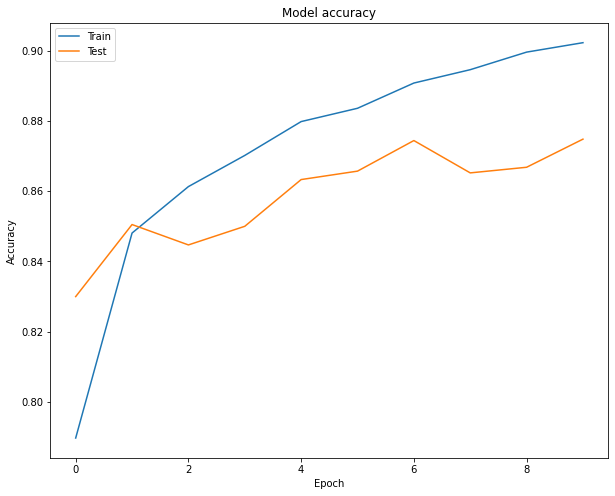

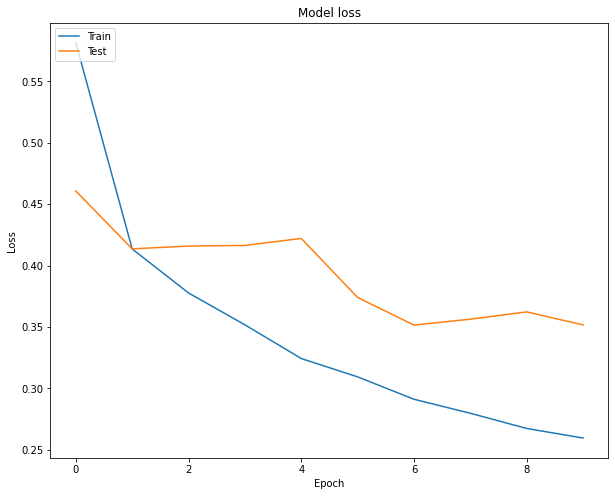

In [104]:
# This function keeps the initial learning rate for the first ten epochs
# and decreases it exponentially after that.
import numpy as np

def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * 0.95


model = Sequential(
    [
        Dense(128, activation="relu", name="layer1"),
        Dense(200, activation="relu", name="layer2"),
        Dense(256, activation="relu", name="layer3")
    ]
)

model.add(Dense(10, activation='softmax'))


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

batch_size = 128
epochs = 10

#setup your optimizer before training
# opt = SGD()     # default: learning_rate=0.01

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1, momentum=0.9), metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[callback],
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_accuracies(history.history['accuracy'], history.history['val_accuracy'])
plot_loss(history.history['loss'], history.history['val_loss'])

Our results didn't necesarrily get better as we already had a very simple use case. However we can notice on our plots that the further we get, the smaller the changes in accuracy/loss get due to a gradually smaller learning rate.

The learning rate is arguably the most important hyperparemeter that you can tune. Of course there are lots of others that need tuning aswell!

<font color='red'>Task: Try different hyperparameters: Add or remove layers, increase or decrease the capacity of a layer or the batch size, try different activation functions or optimizers</font>

In [105]:
...

Ellipsis

## Overfitting

For the next assignment, we'll change our data a bit for educational purposes. The goal is to intentionally overfit our model to see what we can do about it. To achieve this we'll train a very large model on a small subset of the data.

<font color='red'>Task: Run the code to overfit a network on our small dataset and analyze the results. Has our network really overfit?</font>

In [109]:
x_overf = x_train[:2000]
y_overf = y_train[:2000]

x_test_overf = x_test[:1000]
y_test_overf = y_test[:1000]

Test loss: 0.7916669249534607
Test accuracy: 0.8029999732971191


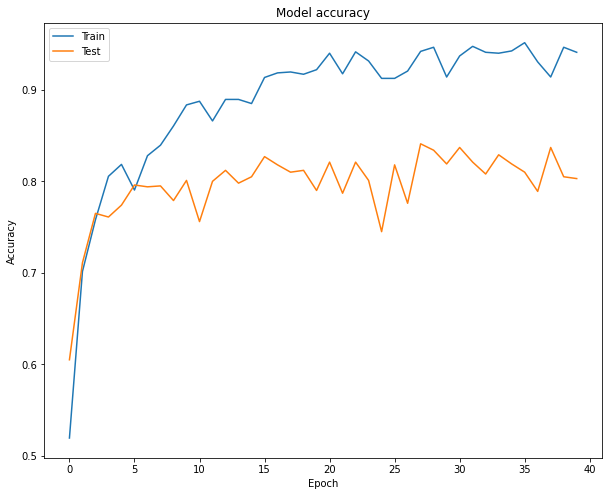

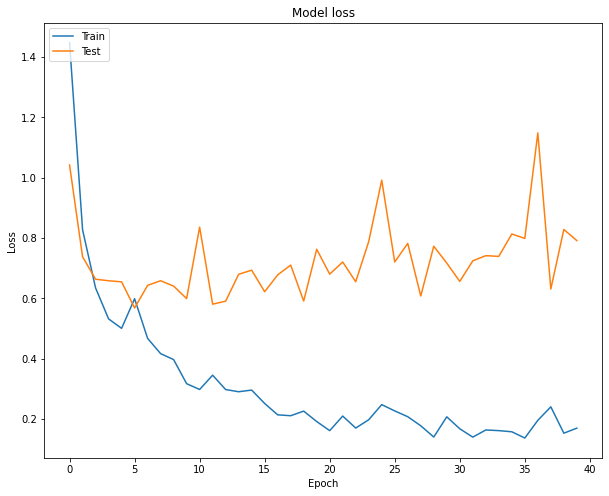

In [110]:
model = Sequential()
model.add(Dense(1000, activation='relu',input_shape=(784,)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1, momentum=0.9), metrics=['accuracy'])

history = model.fit(x_overf, y_overf,
                    batch_size=batch_size,
                    epochs=40,
                    verbose=0,
                    validation_data=(x_test_overf, y_test_overf))

score = model.evaluate(x_test_overf, y_test_overf, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_accuracies(history.history['accuracy'], history.history['val_accuracy'])
plot_loss(history.history['loss'], history.history['val_loss'])

We can clearly see our network has overfit as the validation loss/accuracy went up/stagnated after training for a while. The training accuracy is nearing 100% and the training loss 0 while the validation metrics are not improving. 

## Preventing overfitting
Overfitting is an important problem in deep learning. We can prevent overfitting by using certain **regularization** techniques. The most important of these techniques include: 

- L2 regularization: this is the most common form of regularization. For every weight $w$ we add a term $\frac{1}{2} \lambda w^2$ to the loss function. This will force our model to prefer diffuse weight vectors over peaky vectors (ie we prefer lots of small weights over some large weights). This will encourage the network to use all inputs a little instead of some a lot. 
- L1 regularization: this is another very common form of regularization. For every weight $w$ we add a term $\lambda |w|$. This will force our weights to become sparse during training (ie almost all values become close to zero). The idea here is that we only use a subset of the most important inputs and the noisy inputs will be forgotten. 
- Dropout: this is a very simple but effective technique. It works by simply shutting of certain neurons with a probability $p$ during the training process. This way we try to prevent a network from being too reliant on a few neurons. Of course, during testing no neurons are shut off. A visualisation of dropout can be seen below.

<div>
<img src="images/dropout.png"  />
</div>
Source: https://jmlr.org/papers/v15/srivastava14a.html

In most cases L2 regularization works better than L1. However, it's also possible to use a combination of both: for every weight $w$ we add a term $\lambda _1 |w| + \frac{1}{2} \lambda _2 w^2$

<font color="red"> Task: read up about how regularization can be implemented in keras (<a href="https://keras.io/api/layers/regularizers/">documentation</a>) and change our large model to use L2 regularization and <a href="https://keras.io/api/layers/regularization_layers/dropout/">dropout</a>.</font>

In [113]:
# TODO add regularization to this model
model = Sequential()
model.add(Dense(1000, activation='relu',input_shape=(784,)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1, momentum=0.9), metrics=['accuracy'])

history = model.fit(x_overf, y_overf,
                    batch_size=batch_size,
                    epochs=40,
                    verbose=0,
                    validation_data=(x_test_overf, y_test_overf))

score = model.evaluate(x_test_overf, y_test_overf, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_accuracies(history.history['accuracy'], history.history['val_accuracy'])
plot_loss(history.history['loss'], history.history['val_loss'])

TypeError: add() got an unexpected keyword argument 'kernel_regularizer'

Although it is obvious we could prevent overfitting here by using all our data and making our model smaller it's not always that easy. In most cases, overfitting is still a problem even when there's lots of data and the model isn't way too large. That's why it's often a good idea to use regularization in your models especially as the problem and your data get more complex.

<font color="red"> Task: as a final excercise you can try combining all the techniques we saw today. Train a neural network for classification using regularization and a learning rate scheduler and tune its hyperparameters. How accurate does your model get?</a>.</font>

# Remarks
- Here we looked at **supervised learning**. Neural networks can also be trained unsupervised, for example using **autoencoders**.
- Neural network benefit from (very) large datasets. It is common practice to **augment** your training data with random rotations, flips or by adding noise. You have to be careful however if the augmentation makes sense for your type of data. In the case of character recognition for example, small rotations might be a good augmentation since it forces the network to deal with slightly different handwriting styles. Vertical flips on the other hand are not a good augmentation since a flipped digit is not representative of the data anymore.
- There are a lot of hyperparameters to tune in a neural network. Sometimes it can be useful to use hyperparameter tuning frameworks like [KerasTuner](https://keras.io/api/keras_tuner/) or [Optuna](https://optuna.org/)
- Keeping track of all your experiments can be bothersome. Consider using tools like [TensorBoard](https://www.tensorflow.org/tensorboard) or [Weights and biases](https://wandb.ai/site)